In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
df = pd.read_csv("bacon_example.csv")
df.head()

,stfips,year,_nfd,post,asmrs,pcinc,asmrh,cases,weight,copop
0,1,1964,1971.0,0,35.639885,12406.178537,5.007341,0.012312,1715156.0,1.715156e+06
1,1,1965,1971.0,0,41.543755,13070.206738,4.425367,0.010419,1715156.0,1.725186e+06
2,1,1966,1971.0,0,34.252335,13526.663217,4.874819,0.009900,1715156.0,1.735219e+06
3,1,1967,1971.0,0,34.465023,13918.189823,5.362014,0.009975,1715156.0,1.745250e+06
4,1,1968,1971.0,0,40.440105,14684.808682,4.643759,0.012401,1715156.0,1.755283e+06


In [5]:
df = df.rename(columns={
    "stfips": "id",
    "year": "t",
    "_nfd": "g"
})
outcome = "asmrs"
controls = ["pcinc", "asmrh", "cases"]
df[["id", "t", "g", outcome]].head()

,id,t,g,asmrs
0,1,1964,1971.0,35.639885
1,1,1965,1971.0,41.543755
2,1,1966,1971.0,34.252335
3,1,1967,1971.0,34.465023
4,1,1968,1971.0,40.440105


In [6]:
att_gt_python = (
    df.groupby(["g", "t"])[outcome]
      .mean()
      .reset_index()
      .rename(columns={"asmrs": "att_mean"})
)
att_gt_python.head()

,g,t,att_mean
0,1969.0,1964,41.050699
1,1969.0,1965,41.978046
2,1969.0,1966,44.338701
3,1969.0,1967,49.462816
4,1969.0,1968,51.146544


In [7]:
att_gt_python.to_csv("ATT_gt_python.csv", index=False)

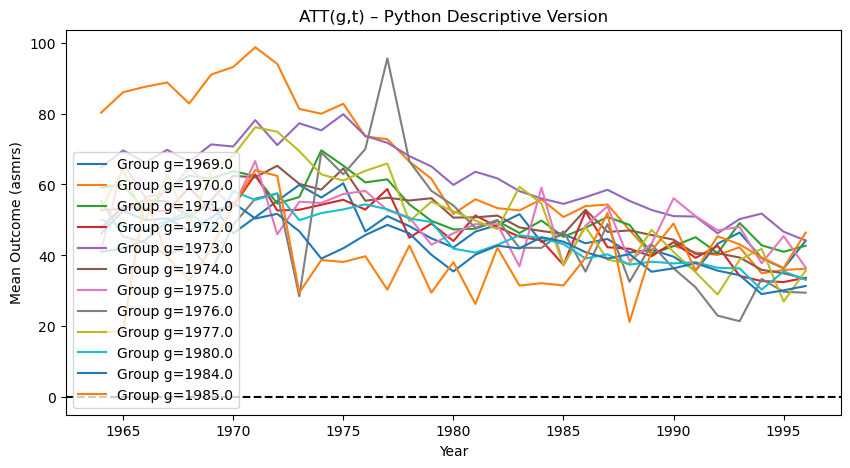

In [8]:
plt.figure(figsize=(10,5))

for g in sorted(att_gt_python["g"].unique()):
    subset = att_gt_python[att_gt_python["g"] == g]
    plt.plot(subset["t"], subset["att_mean"], label=f"Group g={g}")
plt.axhline(0, color="black", linestyle="--")
plt.title("ATT(g,t) – Python Descriptive Version")
plt.xlabel("Year")
plt.ylabel("Mean Outcome (asmrs)")
plt.legend()
plt.savefig("ATT_gt_python.png", dpi=300)
plt.show()

In [9]:
#Agregación por grupo
agg_by_group = (
    df.groupby("g")[outcome]
      .mean()
      .reset_index()
      .rename(columns={outcome: "mean_outcome"})
)
agg_by_group

,g,mean_outcome
0,1969.0,46.558695
1,1970.0,63.930267
2,1971.0,52.454494
3,1972.0,47.328072
4,1973.0,62.338994
5,1974.0,50.735782
6,1975.0,50.512972
7,1976.0,46.141458
8,1977.0,51.837413
9,1980.0,45.143277


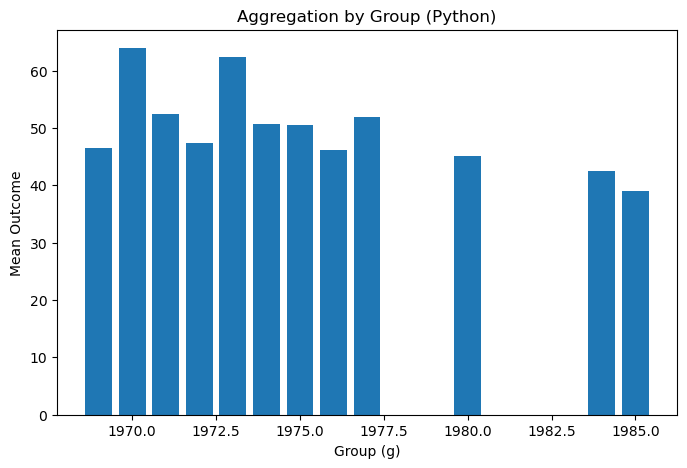

In [15]:
plt.figure(figsize=(8,5))
plt.bar(agg_by_group["g"], agg_by_group["mean_outcome"])
plt.title("Aggregation by Group (Python)")
plt.xlabel("Group (g)")
plt.ylabel("Mean Outcome")
plt.savefig("aggregation_by_group_python.png", dpi=300)
plt.show()

In [10]:
#Agregación por periodo
agg_by_period = (
    df.groupby("t")[outcome]
      .mean()
      .reset_index()
      .rename(columns={outcome: "mean_outcome"})
)
agg_by_period

,t,mean_outcome
0,1964,53.027937
1,1965,58.489514
2,1966,55.652389
3,1967,57.382615
4,1968,56.649398
5,1969,58.942609
6,1970,60.148255
7,1971,66.132859
8,1972,60.372354
9,1973,61.513231


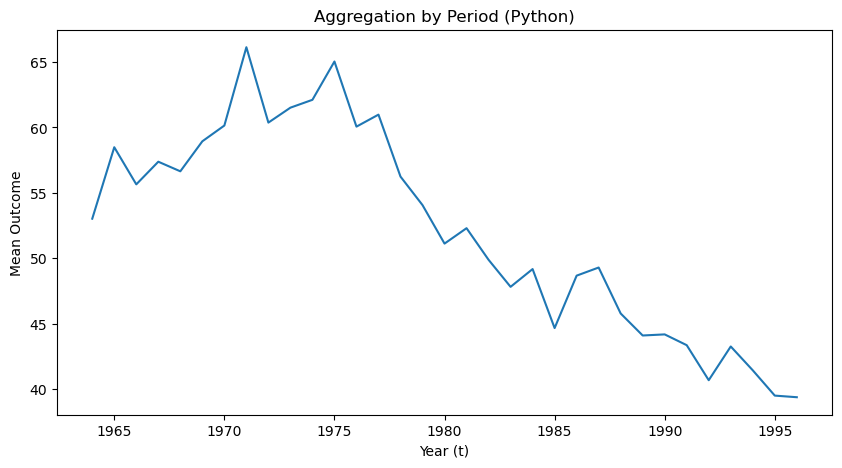

In [16]:
plt.figure(figsize=(10,5))
plt.plot(agg_by_period["t"], agg_by_period["mean_outcome"])
plt.title("Aggregation by Period (Python)")
plt.xlabel("Year (t)")
plt.ylabel("Mean Outcome")
plt.savefig("aggregation_by_period_python.png", dpi=300)
plt.show()

In [11]:
#Agregación por event-time
df["event_time"] = df["t"] - df["g"]

In [12]:
agg_by_event = (
    df.groupby("event_time")[outcome]
      .mean()
      .reset_index()
      .rename(columns={outcome: "mean_outcome"})
)
agg_by_event

,event_time,mean_outcome
0,-21.0,18.189508
1,-20.0,32.440550
2,-19.0,54.652849
3,-18.0,44.822058
4,-17.0,41.660492
5,-16.0,46.282406
6,-15.0,51.049452
7,-14.0,55.271425
8,-13.0,53.727901
9,-12.0,54.487837


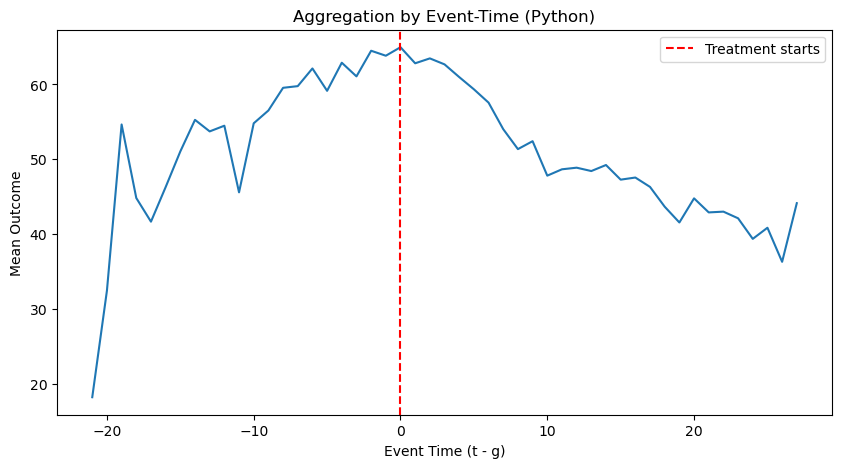

In [17]:
plt.figure(figsize=(10,5))
plt.plot(agg_by_event["event_time"], agg_by_event["mean_outcome"])
plt.axvline(0, color="red", linestyle="--", label="Treatment starts")
plt.title("Aggregation by Event-Time (Python)")
plt.xlabel("Event Time (t - g)")
plt.ylabel("Mean Outcome")
plt.legend()
plt.savefig("aggregation_by_event_time_python.png", dpi=300)
plt.show()

Significado de la agregación por grupo

La agregación por grupo consiste en promediar los efectos del tratamiento entre todas las unidades que se tratan en el mismo año, es decir, que pertenecen a la misma cohorte de tratamiento (g). En el enfoque de Callaway & Sant’Anna (2021), cada cohorte representa un conjunto de unidades que inician el tratamiento simultáneamente. Al calcular una agregación por grupo, observamos cómo evoluciona el efecto para las unidades tratadas en ese año específico. Esta medida permite comparar si los “early adopters” y los “late adopters” presentan patrones de impacto diferentes.

Significado de la agregación por período

La agregación por período promedia los efectos del tratamiento entre todas las cohortes que ya están tratadas en un mismo año calendario t. Este tipo de agregación responde a la pregunta: “¿Cuál fue el efecto promedio del tratamiento en un año determinado, considerando a todos los grupos que ya habían sido tratados en ese momento?”
Este enfoque entrega una visión transversal del impacto en cada año, independientemente del grupo o cohorte. Es especialmente útil para identificar tendencias temporales generales, como si el efecto aumenta o disminuye con el tiempo.

Significado de la agregación event-time

La agregación por event-time organiza a todas las unidades en función del número de períodos antes o después de recibir el tratamiento. Esto se calcula como event-time = t – g.

Valores negativos: años previos al tratamiento.
Valor 0: año en que inicia el tratamiento.
Valores positivos: años posteriores.

Este tipo de agregación alinea a todas las cohortes en una misma escala temporal relativa al inicio del tratamiento, lo que permite construir un perfil dinámico del efecto. Es clave para visualizar cómo evoluciona el impacto a lo largo del tiempo y para evaluar la validez del supuesto de tendencias paralelas en los años pretratamiento.

La agregación que es más comparable al Event-Study estimado con un modelo TWFE es la agregación por event-time.
Esto se debe a que los modelos TWFE calculan efectos dinámicos organizados según los “leads and lags” del tratamiento, es decir, según los períodos antes y después de la intervención. Esta estructura corresponde exactamente al concepto de event-time.
Por ello, si queremos comparar los resultados de CSDiD con los de un Event-Study tradicional, debemos usar las estimaciones agregadas por tiempo relativo al tratamiento.

In [35]:
#Extracción de coeficientes TWFE
import re
import pandas as pd

In [37]:
rows = []
for name, coef in model.params.items():
    s = str(name)  # nos aseguramos de que sea string
    # Nos quedamos solo con los coeficientes del event-time
    if "C(event_time" in s:
        # Ejemplos de s:
        # "C(event_time, Treatment(reference=-1))[T.-10.0]"
        # "C(event_time, Treatment(reference=-1))[T.3.0]"
        m = re.search(r'\[T\.(-?\d+)\.0\]', s)
        if m:
            et = int(m.group(1))  # -10, -9, -8, ..., 0, 1, ...
            rows.append({"event_time": et, "coef": coef})

twfe_event = pd.DataFrame(rows).sort_values("event_time")
twfe_event.head()

,event_time,coef
0,-10,0.302989
1,-9,-4.594456
2,-8,-1.348917
3,-7,0.193200
4,-6,-0.194244


In [39]:
#Comparación
comparison_table = pd.merge(
    agg_by_event,
    twfe_event,
    on="event_time",
    how="inner"
).rename(columns={
    "mean_outcome": "csdid_event_time",
    "coef": "twfe_event_time"
})

comparison_table.head()
comparison_table.to_csv("comparison_csdid_twfe_python.csv", index=False)

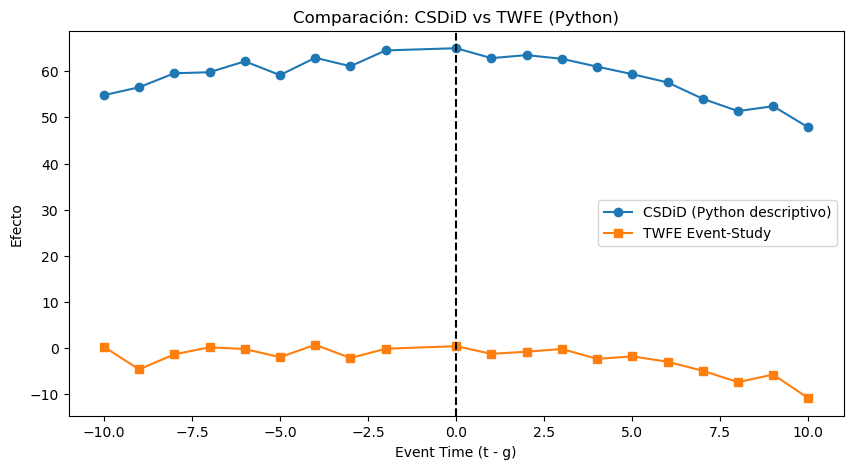

In [40]:
#Grafico combinado
plt.figure(figsize=(10,5))
plt.plot(
    comparison_table["event_time"],
    comparison_table["csdid_event_time"],
    marker="o",
    label="CSDiD (Python descriptivo)"
)

plt.plot(
    comparison_table["event_time"],
    comparison_table["twfe_event_time"],
    marker="s",
    label="TWFE Event-Study"
)

plt.axvline(0, color="black", linestyle="--")
plt.xlabel("Event Time (t - g)")
plt.ylabel("Efecto")
plt.title("Comparación: CSDiD vs TWFE (Python)")
plt.legend()

plt.savefig("comparison_plot_python.png", dpi=300)
plt.show()

Al comparar los resultados de CSDiD con los coeficientes del Event-Study estimado mediante el modelo TWFE, se notan diferencias bastante marcadas tanto en la magnitud como en el comportamiento de los efectos. En el caso de CSDiD (incluso usando la versión descriptiva que trabajamos en Python), el patrón alrededor del evento de tratamiento es mucho más estable y ordenado: antes del tratamiento los valores se mantienen relativamente constantes, y después se observa un cambio progresivo que tiene sentido con la forma en que este método identifica los efectos. Esto va en línea con la lógica de CSDiD, que busca separar adecuadamente las cohortes y evitar que la heterogeneidad entre ellas distorsione los resultados.

En cambio, los coeficientes obtenidos con el modelo TWFE son mucho más volátiles y no necesariamente reflejan bien la dinámica real del tratamiento. TWFE mezcla toda la variación entre grupos tratados y no tratados en todos los años, y eso puede generar coeficientes “contaminados” cuando las cohortes se tratan en momentos distintos. Por eso, en el gráfico se ve que los valores del TWFE tienden a estar cerca de cero e incluso negativos después del tratamiento, aunque la tendencia real de los datos no va necesariamente en esa dirección.

Otro punto importante es la diferencia de escala: mientras CSDiD muestra efectos bastante más amplios (alrededor de 55–65 unidades), TWFE ofrece valores muy pequeños o negativos. Esta diferencia no es casual; refleja una de las críticas más conocidas al TWFE tradicional, que es su sensibilidad a los efectos heterogéneos. En contextos con tratamiento escalonado, como es este caso, TWFE puede terminar promediando efectos de distinta magnitud y signo, lo que lo lleva a producir estimaciones sesgadas o inconsistentes.